It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [1]:
#data Wrangling libraries
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Machine Learning Libraries
from collections import Counter
from imblearn.under_sampling import OneSidedSelection
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix,f1_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Hide warnings

import warnings
warnings.simplefilter('ignore')

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [3]:
train_df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,219129.0,109564.000000,63257.237906,0.000000,54782.000000,109564.000000,164346.000000,219128.000000
Time,219129.0,62377.415376,25620.348569,0.000000,47933.000000,63189.000000,77519.000000,120580.000000
V1,219129.0,0.096008,1.395425,-29.807725,-0.846135,0.385913,1.190661,2.430494
V2,219129.0,0.048345,1.159805,-44.247914,-0.573728,0.046937,0.814145,16.068473
V3,219129.0,0.592102,1.132884,-19.722872,-0.027154,0.735895,1.306110,6.145578
V4,219129.0,0.069273,1.253125,-5.263650,-0.769256,0.064856,0.919353,12.547997
V5,219129.0,-0.161555,1.069530,-37.591259,-0.847346,-0.229929,0.356856,34.581260
V6,219129.0,0.133688,1.202411,-25.659750,-0.631835,-0.087778,0.482388,16.233967
V7,219129.0,-0.128224,0.817207,-31.179799,-0.646730,-0.098970,0.385567,39.824099
V8,219129.0,0.149534,0.716212,-28.903442,-0.095948,0.111219,0.390976,18.270586


In [6]:
train_df.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
test_df.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [8]:
train_df.duplicated().sum()

0

In [9]:
test_df.duplicated().sum()

0

In [10]:
train_df.shape

(219129, 32)

In [11]:
test_df.shape

(146087, 31)

In [12]:
train_df.Class.value_counts()

0    218660
1       469
Name: Class, dtype: int64

### Highly imbalanced dataset

In [13]:
num_col=train_df.columns

# Calculate the skewness of the numerical column
skewness = train_df[num_col].skew()

# Print the skewness value
print('Skewness of', num_col, ':', skewness)



Skewness of Index(['id', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object') : id        2.034320e-15
Time     -1.003110e-01
V1       -1.665854e+00
V2       -2.173930e+00
V3       -1.288304e+00
V4        2.183217e-01
V5        5.478835e-01
V6        1.438684e+00
V7       -2.398198e-01
V8       -6.768427e+00
V9        4.479995e-01
V10       1.296309e+00
V11       6.665395e-02
V12      -1.161589e+00
V13       1.061609e-01
V14      -8.405754e-01
V15      -4.764631e-01
V16      -4.717247e-01
V17      -6.188927e-01
V18      -1.287733e-01
V19      -8.473591e-02
V20       1.778520e+00
V21       5.936353e+00
V22      -1.970778e-01
V23       3.181585e-01
V24      -3.737147e-01
V25      -4.529469e-01
V26       7.687305e-01
V27      -2.056500e+00
V28       1.283371e+01
Amount    9.047609e+00
Cl

id
Skewness: 0.0


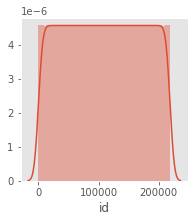

Time
Skewness: -0.10031029410673588


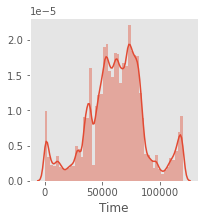

V1
Skewness: -1.665842227852794


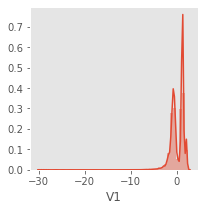

V2
Skewness: -2.1739147038036424


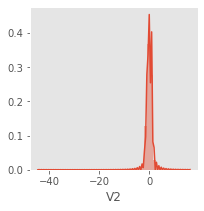

V3
Skewness: -1.2882956775086107


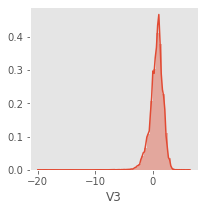

V4
Skewness: 0.21832018722080207


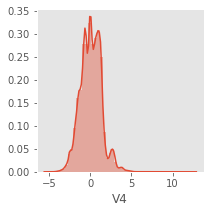

V5
Skewness: 0.5478797031445056


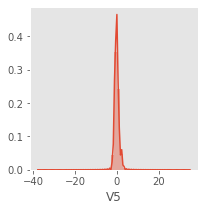

V6
Skewness: 1.4386740526086434


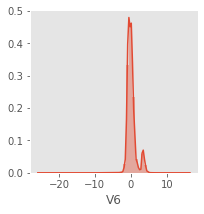

V7
Skewness: -0.23981820386767677


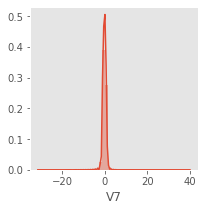

V8
Skewness: -6.768380999975507


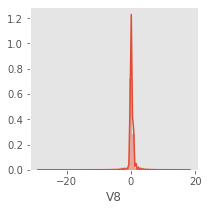

V9
Skewness: 0.44799638700755456


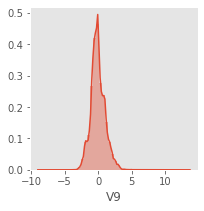

V10
Skewness: 1.2963006081999005


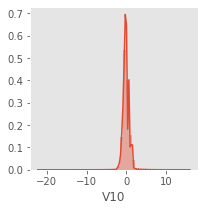

V11
Skewness: 0.06665349760859135


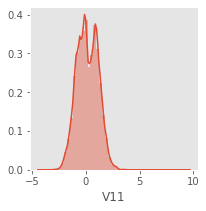

V12
Skewness: -1.161581083131385


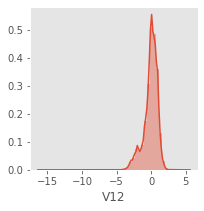

V13
Skewness: 0.1061601543301182


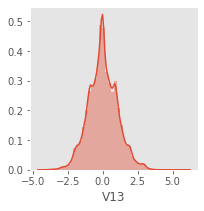

V14
Skewness: -0.840569648295431


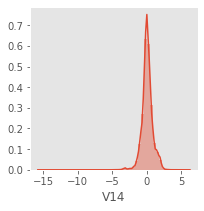

V15
Skewness: -0.4764598211458039


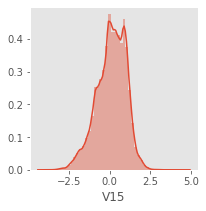

V16
Skewness: -0.47172145649113667


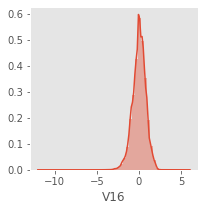

V17
Skewness: -0.6188884580585748


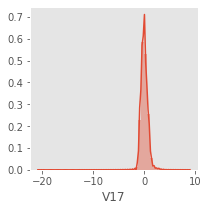

V18
Skewness: -0.12877241994277241


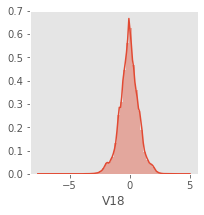

V19
Skewness: -0.0847353301952846


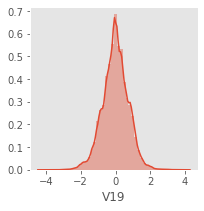

V20
Skewness: 1.7785075245163044


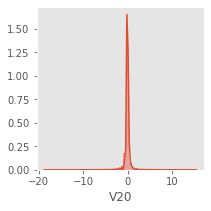

V21
Skewness: 5.936312754266348


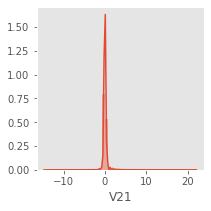

V22
Skewness: -0.19707642241263756


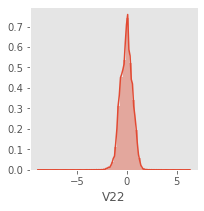

V23
Skewness: 0.31815632292686674


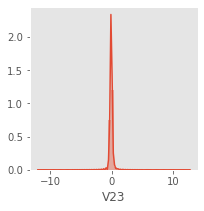

V24
Skewness: -0.37371214978298634


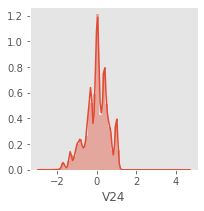

V25
Skewness: -0.45294383461500776


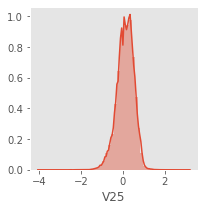

V26
Skewness: 0.7687252042825847


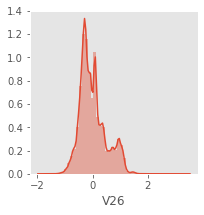

V27
Skewness: -2.0564863773812965


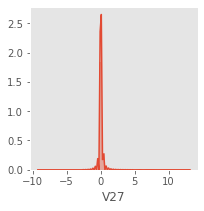

V28
Skewness: 12.833622819209475


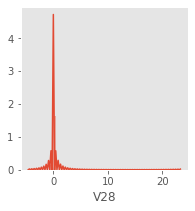

Amount
Skewness: 9.047547274683097


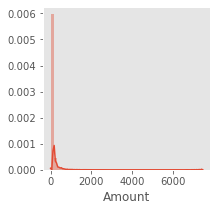

Class
Skewness: 21.545954554756733


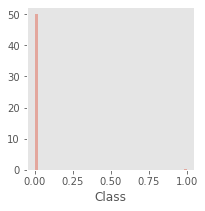

In [14]:
from scipy.stats import skew
for column in train_df:
    print(column)
    print(f"Skewness: {skew(train_df[column])}")
    plt.figure(figsize=(3,3))
    plt.style.use('ggplot')
    sns.distplot(train_df[column])
    plt.grid(False)
    plt.show()

In [15]:
skewed_columns=["V1","V2","V3","V6","V8","V10","V12","V20","V21","V27","V28","Amount"]

In [16]:
for i in skewed_columns:
    # Interquantile Range
    quantile1=train_df[i].quantile(0.25)
    quantile2=train_df[i].quantile(0.75)
    train_df[i]=np.where(train_df[i]<quantile1,quantile1,train_df[i])
    train_df[i]=np.where(train_df[i]>quantile2,quantile2,train_df[i])


In [17]:
train_df.skew()

id        2.034320e-15
Time     -1.003110e-01
V1       -7.188333e-02
V2        8.631826e-02
V3       -1.196068e-01
V4        2.183217e-01
V5        5.478835e-01
V6        3.430257e-02
V7       -2.398198e-01
V8        1.225994e-01
V9        4.479995e-01
V10       1.816709e-01
V11       6.665395e-02
V12      -6.840297e-02
V13       1.061609e-01
V14      -8.405754e-01
V15      -4.764631e-01
V16      -4.717247e-01
V17      -6.188927e-01
V18      -1.287733e-01
V19      -8.473591e-02
V20       7.052834e-02
V21      -6.006531e-03
V22      -1.970778e-01
V23       3.181585e-01
V24      -3.737147e-01
V25      -4.529469e-01
V26       7.687305e-01
V27      -4.514115e-02
V28       1.763448e-01
Amount    4.349691e-01
Class     2.154610e+01
dtype: float64

id
Skewness: 0.0


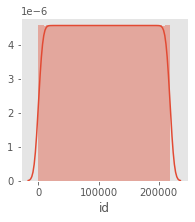

Time
Skewness: -0.10031029410673588


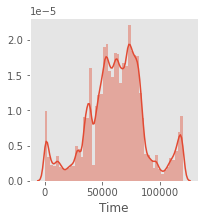

V1
Skewness: -0.07188283852509131


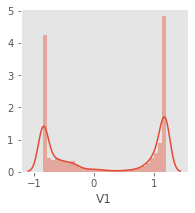

V2
Skewness: 0.08631767225299555


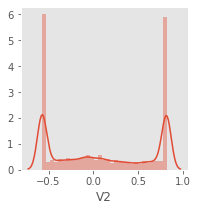

V3
Skewness: -0.119605988052805


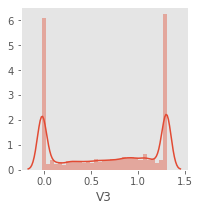

V4
Skewness: 0.21832018722080207


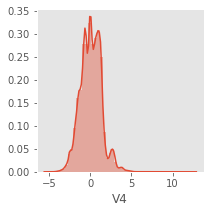

V5
Skewness: 0.5478797031445056


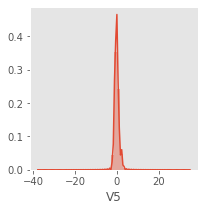

V6
Skewness: 0.03430233342504639


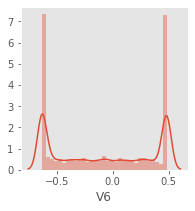

V7
Skewness: -0.23981820386767677


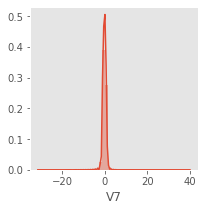

V8
Skewness: 0.12259851738861163


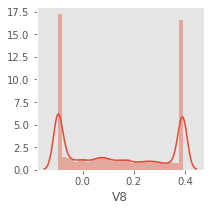

V9
Skewness: 0.44799638700755456


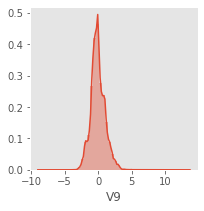

V10
Skewness: 0.18166966426229342


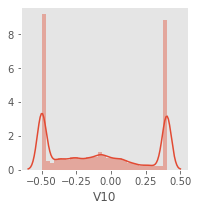

V11
Skewness: 0.06665349760859135


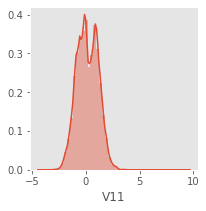

V12
Skewness: -0.06840250103826048


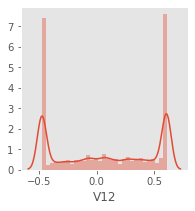

V13
Skewness: 0.1061601543301182


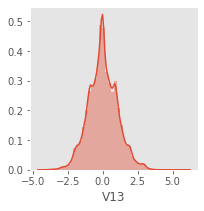

V14
Skewness: -0.840569648295431


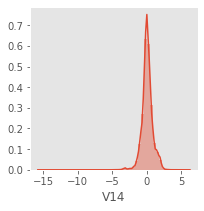

V15
Skewness: -0.4764598211458039


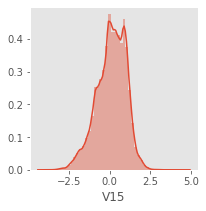

V16
Skewness: -0.47172145649113667


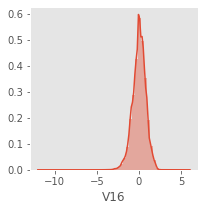

V17
Skewness: -0.6188884580585748


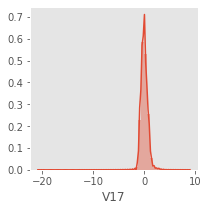

V18
Skewness: -0.12877241994277241


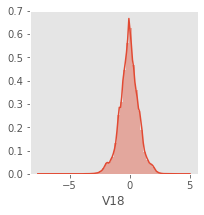

V19
Skewness: -0.0847353301952846


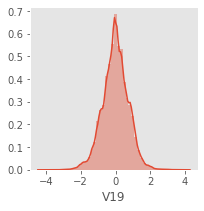

V20
Skewness: 0.07052786055320777


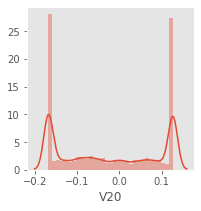

V21
Skewness: -0.006006489775567588


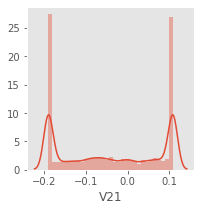

V22
Skewness: -0.19707642241263756


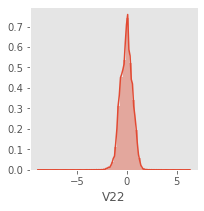

V23
Skewness: 0.31815632292686674


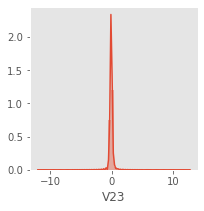

V24
Skewness: -0.37371214978298634


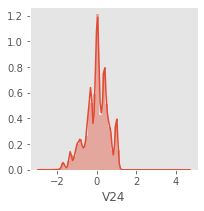

V25
Skewness: -0.45294383461500776


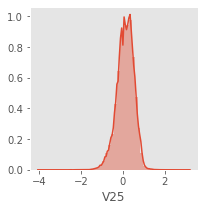

V26
Skewness: 0.7687252042825847


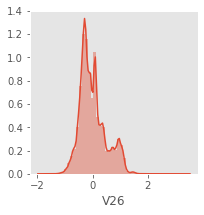

V27
Skewness: -0.04514083856185543


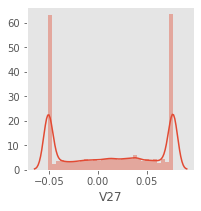

V28
Skewness: 0.17634364145069026


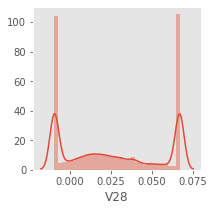

Amount
Skewness: 0.4349661147959967


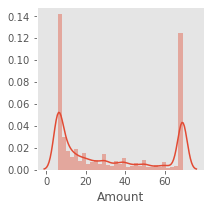

Class
Skewness: 21.545954554756733


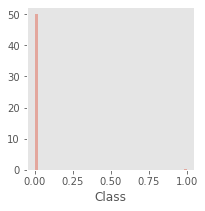

In [18]:
from scipy.stats import skew
for column in train_df:
    print(column)
    print(f"Skewness: {skew(train_df[column])}")
    plt.figure(figsize=(3,3))
    plt.style.use('ggplot')
    sns.distplot(train_df[column])
    plt.grid(False)
    plt.show()

### Similarly we  check for skewness in test dataset and dealing with it

In [19]:
test_df.skew()

id        1.431321e-13
Time      2.921776e-02
V1       -1.525059e+00
V2       -2.067205e+00
V3       -9.896124e-02
V4        1.000249e+00
V5        4.137051e-01
V6        1.479377e+00
V7        3.032797e-02
V8       -5.592553e+00
V9        9.819899e-02
V10       1.111115e+00
V11      -7.943680e-02
V12      -3.910243e-01
V13      -2.261591e-01
V14      -8.481410e-01
V15      -1.210799e-01
V16      -3.732086e-01
V17       6.169793e-01
V18      -1.338304e-01
V19       1.607112e-01
V20       7.725797e-01
V21       3.209250e+00
V22      -3.102038e-01
V23       7.386685e-01
V24      -1.179986e-01
V25       7.995749e-02
V26       5.236426e-01
V27      -1.831449e+00
V28       2.236694e+00
Amount    8.695514e+00
dtype: float64

id
Skewness: 0.0


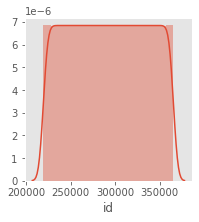

Time
Skewness: 0.029217457528403278


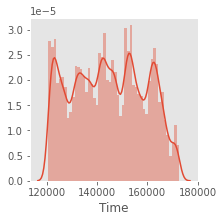

V1
Skewness: -1.5250437867223001


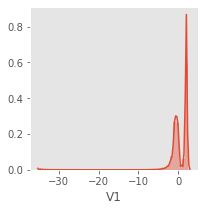

V2
Skewness: -2.0671839867132746


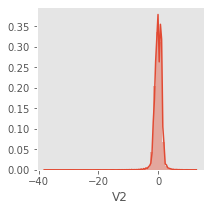

V3
Skewness: -0.09896022324394019


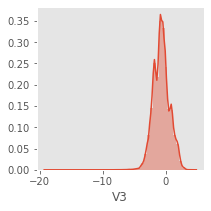

V4
Skewness: 1.0002384245280562


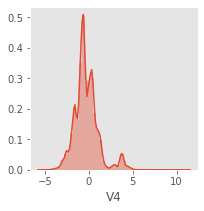

V5
Skewness: 0.41370089684121786


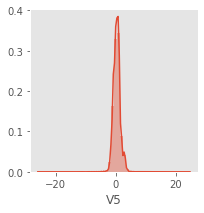

V6
Skewness: 1.4793617823529146


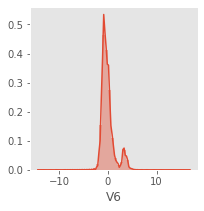

V7
Skewness: 0.03032765513803213


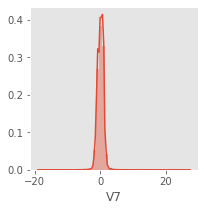

V8
Skewness: -5.592495338207322


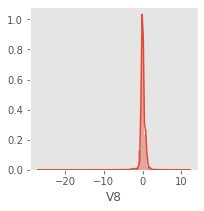

V9
Skewness: 0.09819797808005933


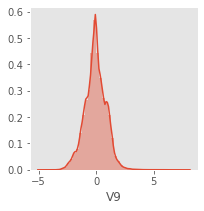

V10
Skewness: 1.1111039999986423


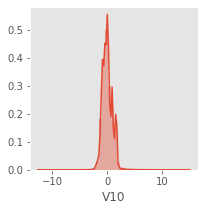

V11
Skewness: -0.07943598889404432


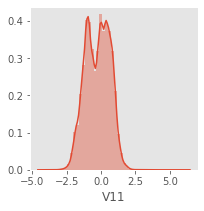

V12
Skewness: -0.39102030411971295


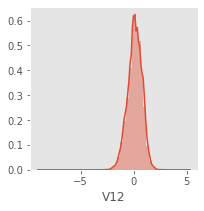

V13
Skewness: -0.2261567513841873


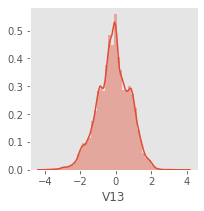

V14
Skewness: -0.8481322799547344


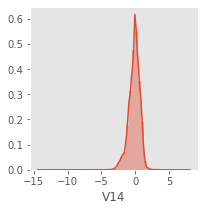

V15
Skewness: -0.12107869979425334


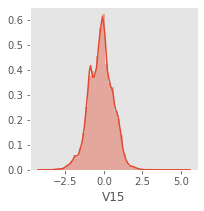

V16
Skewness: -0.3732048118070412


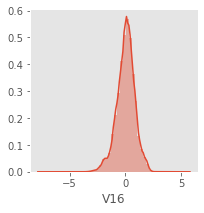

V17
Skewness: 0.6169729909392365


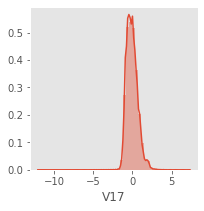

V18
Skewness: -0.1338289877283409


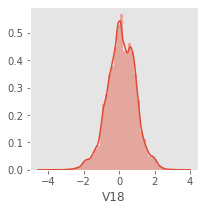

V19
Skewness: 0.16070952093666968


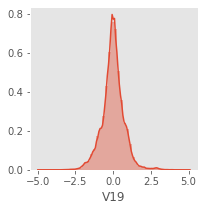

V20
Skewness: 0.7725717413222168


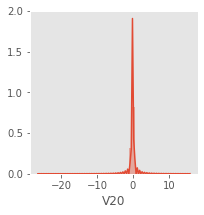

V21
Skewness: 3.209217359135636


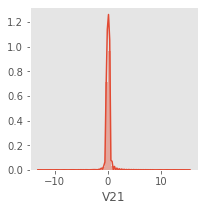

V22
Skewness: -0.3102005678793528


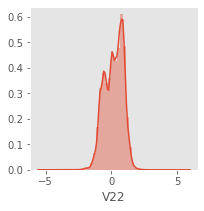

V23
Skewness: 0.7386609214267854


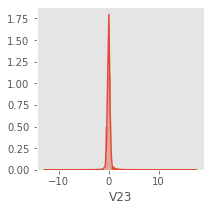

V24
Skewness: -0.11799740473176977


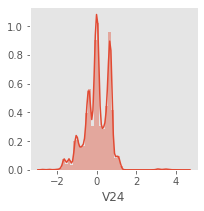

V25
Skewness: 0.07995666671157056


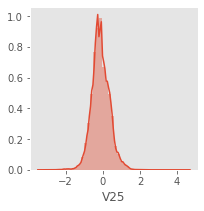

V26
Skewness: 0.5236372238450065


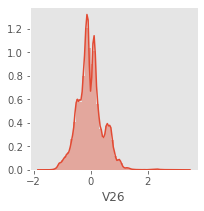

V27
Skewness: -1.8314300870913751


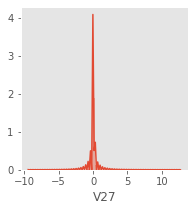

V28
Skewness: 2.2366712157233697


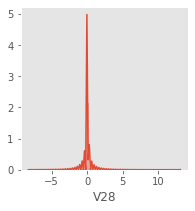

Amount
Skewness: 8.69542477555182


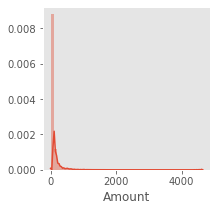

In [20]:
from scipy.stats import skew
for column in test_df:
    print(column)
    print(f"Skewness: {skew(test_df[column])}")
    plt.figure(figsize=(3,3))
    plt.style.use('ggplot')
    sns.distplot(test_df[column])
    plt.grid(False)
    plt.show()

In [21]:
skewed_test_columns=["V1","V2","V6","V8","V21","V27","V28","Amount"]

In [22]:
for i in skewed_columns:
    # Interquantile Range
    quantile1=test_df[i].quantile(0.25)
    quantile2=test_df[i].quantile(0.75)
    test_df[i]=np.where(test_df[i]<quantile1,quantile1,test_df[i])
    test_df[i]=np.where(test_df[i]>quantile2,quantile2,test_df[i])


In [23]:
test_df.skew()

id        1.431321e-13
Time      2.921776e-02
V1       -2.148462e-02
V2        3.966228e-02
V3       -7.504993e-02
V4        1.000249e+00
V5        4.137051e-01
V6        1.137375e-01
V7        3.032797e-02
V8        6.820568e-02
V9        9.819899e-02
V10       8.465010e-02
V11      -7.943680e-02
V12      -8.864011e-03
V13      -2.261591e-01
V14      -8.481410e-01
V15      -1.210799e-01
V16      -3.732086e-01
V17       6.169793e-01
V18      -1.338304e-01
V19       1.607112e-01
V20       7.927100e-02
V21      -5.168617e-02
V22      -3.102038e-01
V23       7.386685e-01
V24      -1.179986e-01
V25       7.995749e-02
V26       5.236426e-01
V27       7.541179e-02
V28       4.797658e-01
Amount    4.109244e-01
dtype: float64

Text(0.5, 1.0, 'Corelation Matrix')

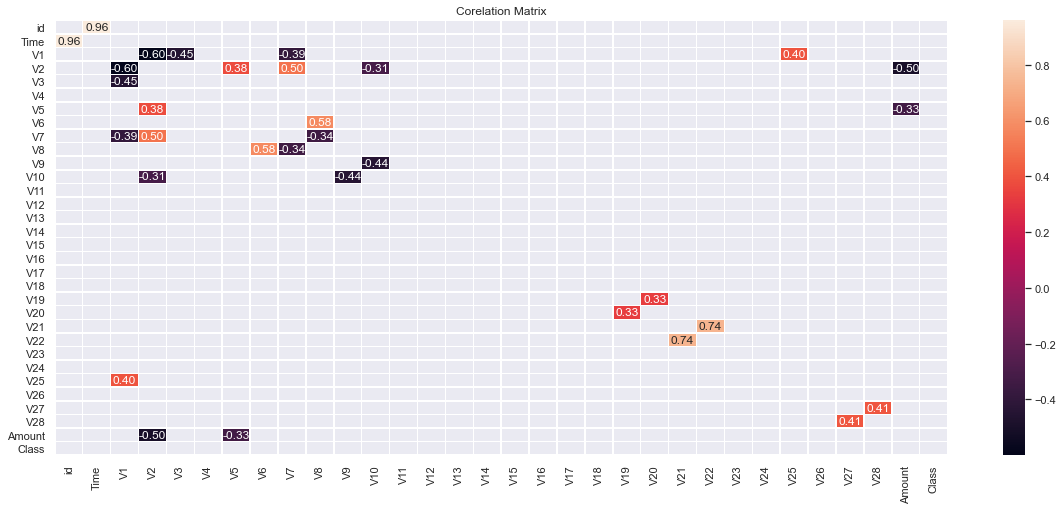

In [24]:
sns.set(rc={'figure.figsize':(20,8)})
corr = train_df.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')
plt.title('Corelation Matrix')

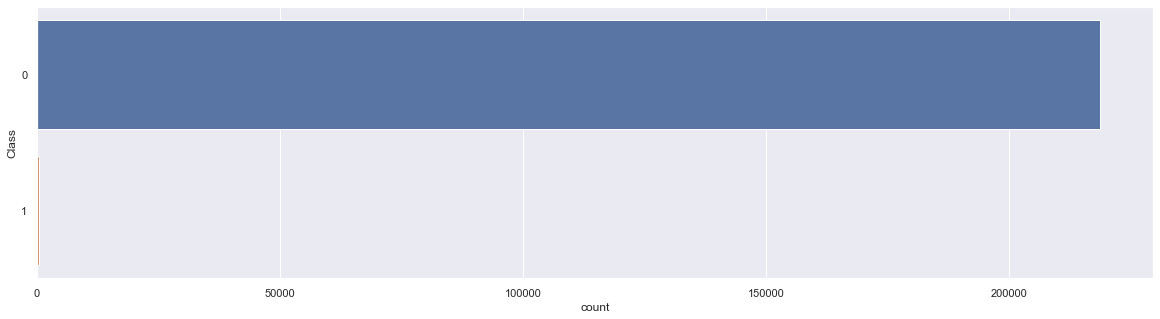

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(y=train_df['Class'])
plt.show()


Data Transforms - Time and Amount 
The range used to scale each variable is chosen by default as the IQR is bounded by the 25th and 75th percentiles. This is specified by the quantile_range argument as a tuple. Other values can be specified and might improve the performance of the model, such as a wider range, allowing fewer values to be considered outliers, or a more narrow range, allowing more values to be considered outliers.

Here, I apply the RobustScaler only on Time and Amount features.

In [26]:
y= train_df['Class']
X= train_df.drop(['id', 'Class'], axis=1)
test=test_df.drop(['id'], axis=1)


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))
test = pd.DataFrame(scaler.transform(test))#since this is the test data so we only tranform and not fit_transform

In [28]:
print('X shape:\t', X.shape)
print('Test shape:\t', test.shape)
print('Target Dataset shape:\t', y.shape)
print('train_df Null Values:\t', X.isnull().sum().sum())
print('Test_df Null Values:\t', test.isnull().sum().sum())

X shape:	 (219129, 30)
Test shape:	 (146087, 30)
Target Dataset shape:	 (219129,)
train_df Null Values:	 0
Test_df Null Values:	 0


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       219129 non-null  float64
 1   1       219129 non-null  float64
 2   2       219129 non-null  float64
 3   3       219129 non-null  float64
 4   4       219129 non-null  float64
 5   5       219129 non-null  float64
 6   6       219129 non-null  float64
 7   7       219129 non-null  float64
 8   8       219129 non-null  float64
 9   9       219129 non-null  float64
 10  10      219129 non-null  float64
 11  11      219129 non-null  float64
 12  12      219129 non-null  float64
 13  13      219129 non-null  float64
 14  14      219129 non-null  float64
 15  15      219129 non-null  float64
 16  16      219129 non-null  float64
 17  17      219129 non-null  float64
 18  18      219129 non-null  float64
 19  19      219129 non-null  float64
 20  20      219129 non-null  float64
 21  21      21

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       219129 non-null  float64
 1   1       219129 non-null  float64
 2   2       219129 non-null  float64
 3   3       219129 non-null  float64
 4   4       219129 non-null  float64
 5   5       219129 non-null  float64
 6   6       219129 non-null  float64
 7   7       219129 non-null  float64
 8   8       219129 non-null  float64
 9   9       219129 non-null  float64
 10  10      219129 non-null  float64
 11  11      219129 non-null  float64
 12  12      219129 non-null  float64
 13  13      219129 non-null  float64
 14  14      219129 non-null  float64
 15  15      219129 non-null  float64
 16  16      219129 non-null  float64
 17  17      219129 non-null  float64
 18  18      219129 non-null  float64
 19  19      219129 non-null  float64
 20  20      219129 non-null  float64
 21  21      21

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


# Initialize the classifier
clf_1 = DecisionTreeClassifier()
clf_2 = RandomForestClassifier()

clf_3 = LogisticRegression()

clf_4 = XGBClassifier()
# Perform stratified k-fold cross-validation
for clf in (clf_1,clf_2,clf_3,clf_4):

    n_splits = 5  # number of folds
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores for each fold
    accuracy_scores = []

for train_index, val_index in skf.split(X, y):
    # Split the data into training and test sets
    X_train, X_val = X.loc[train_index], X.loc[val_index]
    y_train, y_val = y.loc[train_index], y.loc[val_index]
    

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_val)

    # Calculate accuracy score
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score for this fold
    accuracy_scores.append(accuracy)

# Calculate and print the average accuracy score
average_accuracy = np.mean(accuracy_scores)
print("Average Accuracy: {:.2f}%".format(average_accuracy * 100))



Average Accuracy: 99.79%


In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Initialize the models
models = [('Logistic Regression', LogisticRegression()),
          ('Random Forest', RandomForestClassifier()),
          ('XGBoost', XGBClassifier())]

# Initialize k-fold cross-validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of folds as needed

# Lists to store the performance metrics for each model
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through each model
for model_name, model in models:
    # Lists to store the performance metrics for the current model
    model_accuracy_scores = []
    model_precision_scores = []
    model_recall_scores = []
    model_f1_scores = []

    # Perform k-fold cross-validation for the current model
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.loc[train_index], X.loc[val_index]
        y_train, y_val = y.loc[train_index], y.loc[val_index]

        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_val)

        # Calculate performance metrics for the current fold
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Append the performance metrics to the lists
        model_accuracy_scores.append(accuracy)
        model_precision_scores.append(precision)
        model_recall_scores.append(recall)
        model_f1_scores.append(f1)

    # Calculate average performance metrics for the current model
    mean_accuracy = np.mean(model_accuracy_scores)
    mean_precision = np.mean(model_precision_scores)
    mean_recall = np.mean(model_recall_scores)
    mean_f1 = np.mean(model_f1_scores)

    # Append the average performance metrics to the overall lists
    accuracy_scores.append(mean_accuracy)
    precision_scores.append(mean_precision)
    recall_scores.append(mean_recall)
    f1_scores.append(mean_f1)

    # Print the results for the current model
    print(f"Model: {model_name}")
    print("Mean Accuracy: ", mean_accuracy)
    print("Mean Precision: ", mean_precision)
    print("Mean Recall: ", mean_recall)
    print("Mean F1 Score: ", mean_f1)
    print("------------------------------")

# Print the overall results
print("Overall Results")
print("Mean Accuracy Scores: ", accuracy_scores)
print("Mean Precision Scores: ", precision_scores)
print("Mean Recall Scores: ", recall_scores)
print("Mean F1 Scores: ", f1_scores)


Model: Logistic Regression
Mean Accuracy:  0.9978597082915327
Mean Precision:  0.2
Mean Recall:  0.002127659574468085
Mean F1 Score:  0.004210526315789474
------------------------------
Model: Random Forest
Mean Accuracy:  0.9978551447904145
Mean Precision:  0.0
Mean Recall:  0.0
Mean F1 Score:  0.0
------------------------------
Model: XGBoost
Mean Accuracy:  0.9978505813934267
Mean Precision:  0.5
Mean Recall:  0.010661175932280942
Mean F1 Score:  0.020793119836221393
------------------------------
Overall Results
Mean Accuracy Scores:  [0.9978597082915327, 0.9978551447904145, 0.9978505813934267]
Mean Precision Scores:  [0.2, 0.0, 0.5]
Mean Recall Scores:  [0.002127659574468085, 0.0, 0.010661175932280942]
Mean F1 Scores:  [0.004210526315789474, 0.0, 0.020793119836221393]


In [42]:
model= XGBClassifier()

In [43]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [44]:
y_pred=model.predict(test)

In [45]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
submission_df=pd.DataFrame(y_pred,columns=['predictions'])

In [53]:
submission_df['predictions'].value_counts()

0    146072
1        15
Name: predictions, dtype: int64